In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import os

In [4]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
data_path = os.path.join("..", "data", "pima-indians-diabetes.csv")
data = np.loadtxt(data_path, delimiter=",")

In [6]:
x_train = data[:700, 0:8]
y_train = data[:700, 8]

x_test = data[700:, 0:8]
y_test = data[700:, 8]

In [7]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
opt = optimizers.Adam(learning_rate=0.01)

In [9]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs=1000, batch_size=64)

Epoch 1/1000
11/11 [==============================] - 1s 5ms/step - loss: 2.1266 - accuracy: 0.5457
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 1.1786 - accuracy: 0.5857
Epoch 3/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.8205 - accuracy: 0.6086
Epoch 4/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.7533 - accuracy: 0.5857
Epoch 5/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.7117 - accuracy: 0.6257
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6800 - accuracy: 0.6343
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.6202 - accuracy: 0.6971
Epoch 8/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6249 - accuracy: 0.6786
Epoch 9/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.6109 - accuracy: 0.6814
Epoch 10/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.7091 - accuracy: 0.6657

In [11]:
accuracy = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], accuracy[1] * 100))

3/3 [==============================] - 0s 7ms/step - loss: 0.7672 - accuracy: 0.7794
accuracy: 77.94%


In [12]:
accuracy = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], accuracy[1] * 100))

22/22 [==============================] - 0s 5ms/step - loss: 0.3823 - accuracy: 0.8143
accuracy: 81.43%


In [13]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

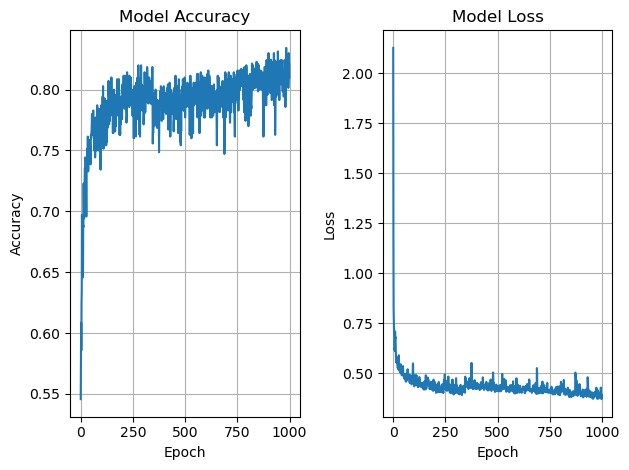

In [14]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()